# 2. Bias-Variance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
a = open('Q2_data/X_train.pkl','rb')
x_train = pickle.load(a)

b = open('Q2_data/Y_train.pkl','rb')
y_train = pickle.load(b)

c = open('Q2_data/X_test.pkl','rb')
x_test = pickle.load(c)

d = open('Q2_data/Fx_test.pkl','rb')
y_test = pickle.load(d)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 400)
(20, 400)
(80,)
(80,)


you have been given 20 subsets of training data containing
400 samples each. For each polynomial, create 20 models trained on the 20
different subsets and find the variance of the predictions on the testing data.
Also, find the bias of your trained models on the testing data. Finally plot the
bias-variance trade-Off graph

Note: You do not need to plot the curve for total error. The formula for
bias and variance are for a single input but as the testing data contains more
than one input, take the mean wherever required. Write your observations in
the report with respect to underfitting, overfitting and also comment on the
type of data just by looking at the bias-variance plot.

In [ ]:
x_train = x_train.T
y_train = y_train.T
print(x_train.shape)
print(y_train.shape)

(400, 20)
(400, 20)


In [ ]:
parts = 20
xparts = np.array_split(x_train,parts,axis=1)
yparts = np.array_split(y_train,parts,axis=1)
xparts[0].shape

(400, 1)

In [ ]:
print([i.shape for i in xparts])
print([i.shape for i in yparts])

[(400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1)]
[(400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1)]


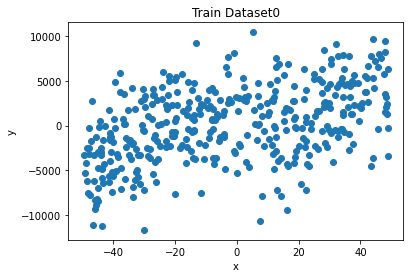

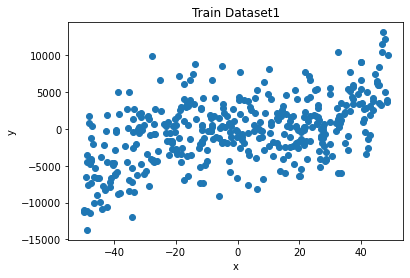

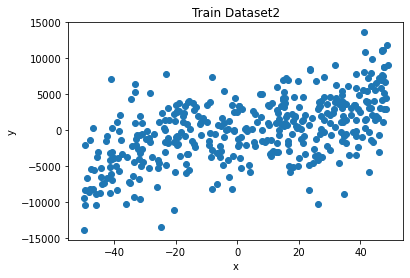

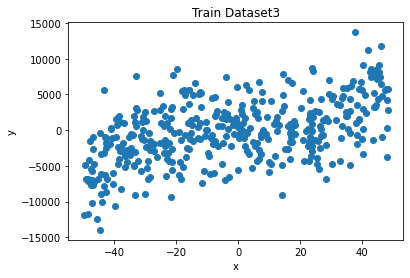

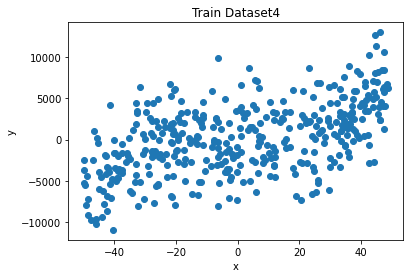

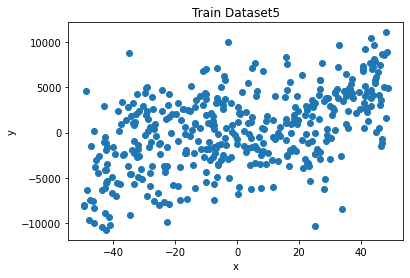

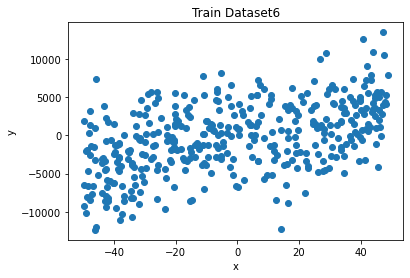

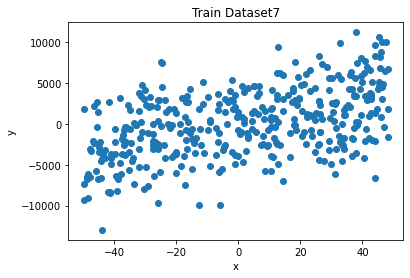

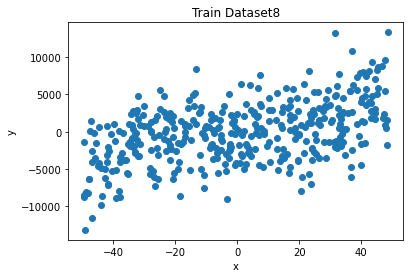

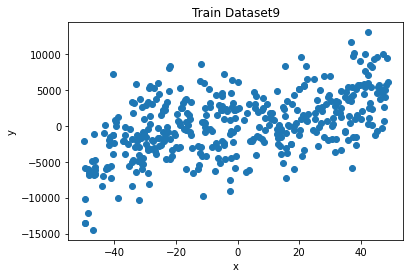

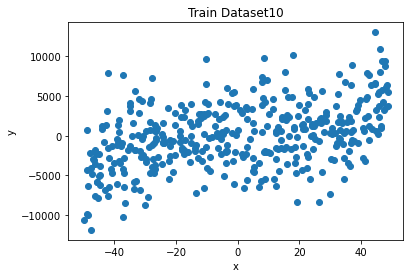

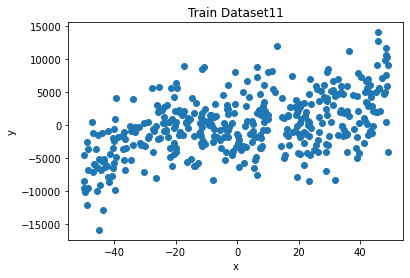

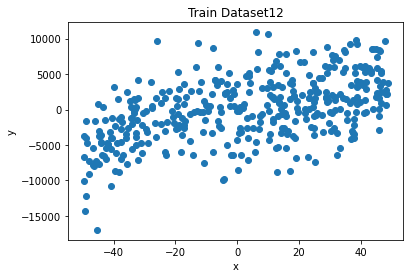

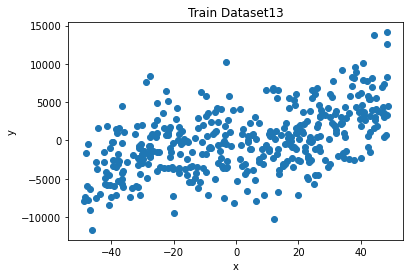

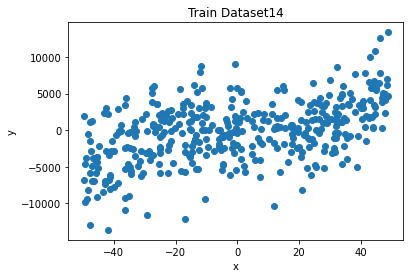

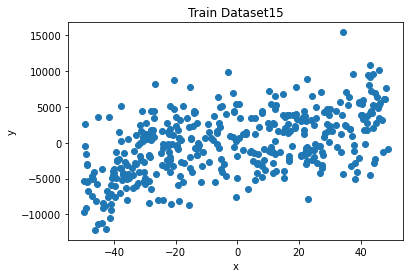

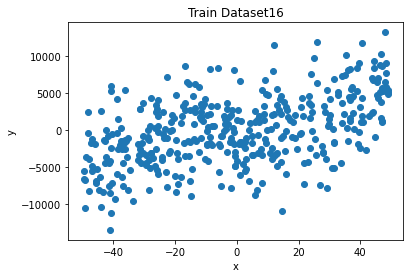

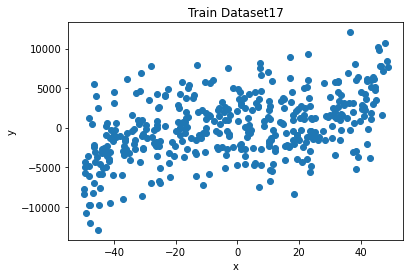

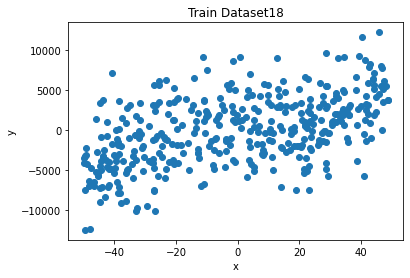

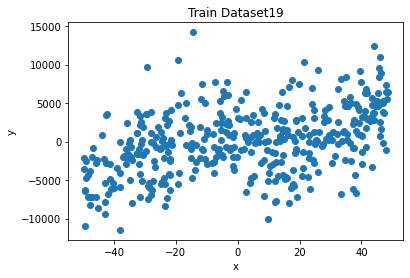

In [ ]:
# Draw the training datasets
for i in range(0,20):
    plt.scatter(xparts[i], yparts[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Train Dataset'+str(i))
    plt.show()

In [ ]:
errors = []
bias = []
variance = []
variance2 = []
bias_square = []

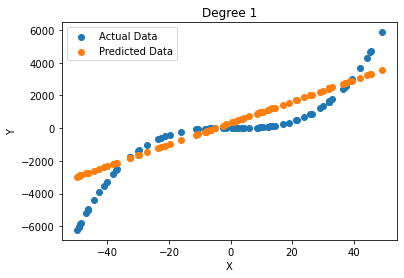

predict shape is 20
errors shape is 1
variance shape is 1


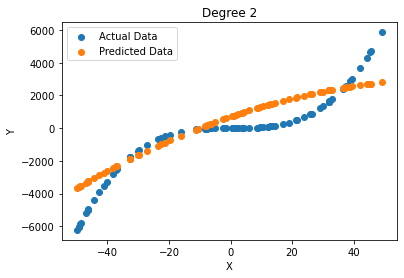

predict shape is 20
errors shape is 2
variance shape is 2


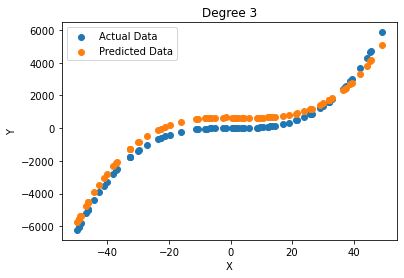

predict shape is 20
errors shape is 3
variance shape is 3


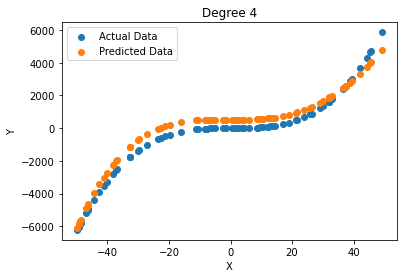

predict shape is 20
errors shape is 4
variance shape is 4


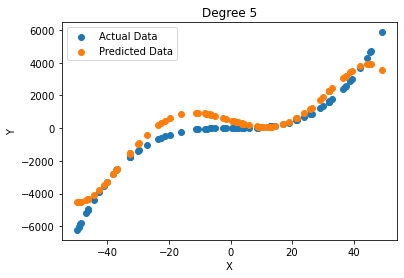

predict shape is 20
errors shape is 5
variance shape is 5


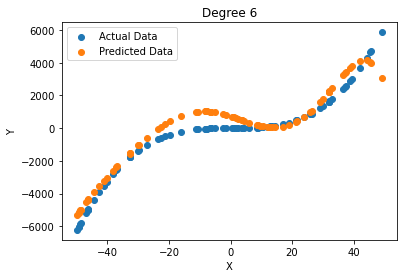

predict shape is 20
errors shape is 6
variance shape is 6


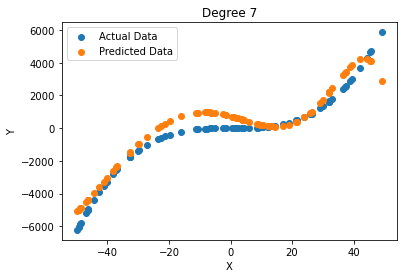

predict shape is 20
errors shape is 7
variance shape is 7


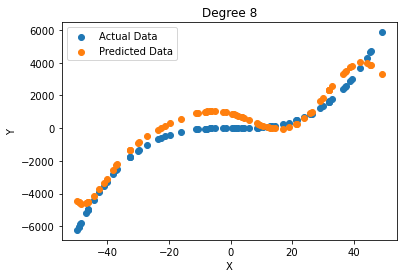

predict shape is 20
errors shape is 8
variance shape is 8


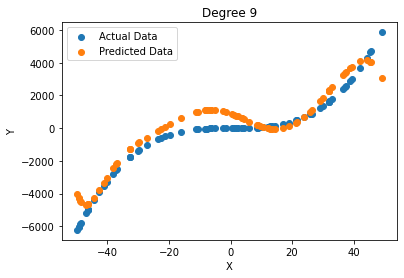

predict shape is 20
errors shape is 9
variance shape is 9


In [ ]:
for i in range(1,10):
    diffs = []
    diffs_abs = []
    predict = []
    error = []
    
    poly = PolynomialFeatures(degree = i)
    test_x = poly.fit_transform(x_test.reshape(-1,1))
    # create different models for every partition , same equation on different part of the data (10 parts)
    for j in range(parts):     # 20  
        train_x = poly.fit_transform(xparts[j].reshape(-1,1))

        regressor = linear_model.LinearRegression()
        regressor.fit(train_x , yparts[j])
        prediction = regressor.predict(test_x)

        diffs.append(prediction - y_test)
        diffs_abs.append(abs(prediction - y_test))
        predict.append(prediction)
        error.append(mean_squared_error(y_test , prediction))

        if j == 0:
        # make a plot for this model using the 1st partitions, we have 10 models trained with 20 different datasets (200 total), plot the first one of each
            plt.figure(i)
            plt.scatter(x_test, y_test, label='Actual Data')
            plt.legend()
            plt.scatter(x_test, prediction, label='Predicted Data')
            plt.legend()
            plt.xlabel("X") 
            plt.ylabel("Y") 
            plt.title('Degree ' + str(i))
            plt.show(i)

    print("predict shape is "+ str(len(predict)))
    errors.append(np.mean(error))
    print("errors shape is "+ str(len(errors)))

    diffs = np.array(diffs)
    diffs = np.transpose(diffs)

    diffs_abs = np.array(diffs_abs)
    diffs_abs = np.transpose(diffs_abs)

    predict = np.array(predict)
    bias_abs = np.mean(np.mean(diffs_abs,1))
    bias_sq = np.mean(np.mean(diffs,1)**2)

    bias.append(bias_abs)
    bias_square.append(bias_sq)

    variance.append(np.mean((predict - np.mean(predict,0))**2))
    print("variance shape is "+ str(len(variance)))

   Degree        Errors         Bias       Variance  Irreducible Error
0       1  1.069774e+06  2707.192784   70545.489146      -5.694252e+06
1       2  1.080490e+06  2720.158024  125870.855549      -5.738222e+06
2       3  1.594635e+05  2788.248574  150073.739546      -6.632739e+06
3       4  2.231431e+05  2793.873542  212235.708326      -6.632146e+06
4       5  2.857277e+05  2800.649147  276388.480250      -6.636459e+06
5       6  3.271121e+05  2809.115986  316863.499039      -6.637029e+06
6       7  3.678464e+05  2808.501865  357511.095925      -6.636693e+06
7       8  4.144410e+05  2812.831417  404290.843003      -6.643126e+06
8       9  4.693414e+05  2817.749195  458768.837654      -6.642444e+06


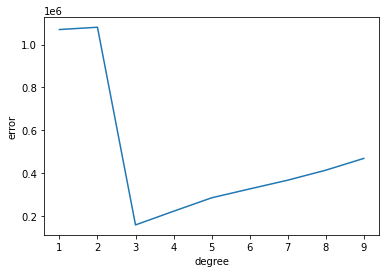

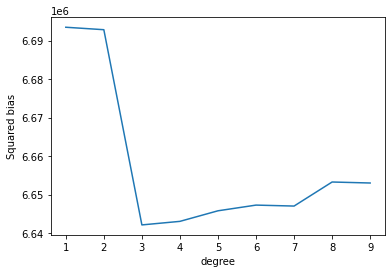

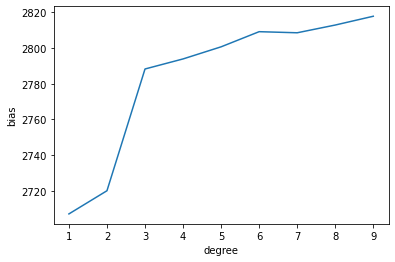

([<matplotlib.axis.XTick at 0x181f4c02190>,
 <a list of 9 Text major ticklabel objects>)

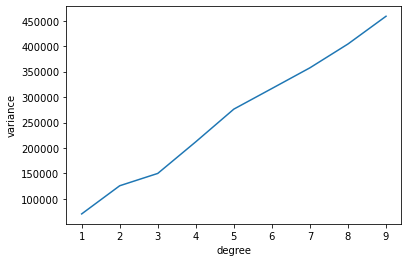

In [ ]:
errors = np.array(errors)
bias_square = np.array(bias_square)
variance = np.array(variance)
irreducible_error = np.array(errors - (bias_square+variance))

df = pd.DataFrame({ 'Degree': [i for i in range(1, 10)],
    'Errors': errors, 'Bias': bias, 'Variance': variance,'Irreducible Error': irreducible_error })
print(df)

plt.close()

plt.figure(10)
plt.plot(range(1,10),errors)
plt.xticks(list(range(1, 10)))
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

plt.figure(22)
plt.plot(range(1,10),bias_square)
plt.xticks(list(range(1, 10)))
plt.xlabel('degree')
plt.ylabel('Squared bias')
plt.show()

plt.figure(22)
plt.plot(range(1,10),bias)
plt.xticks(list(range(1, 10)))
plt.xlabel('degree')
plt.ylabel('bias')
plt.show()

plt.figure(23)
plt.plot(range(1,10),variance)
plt.xlabel('degree')
plt.ylabel("variance")
plt.xticks(list(range(1, 10)))

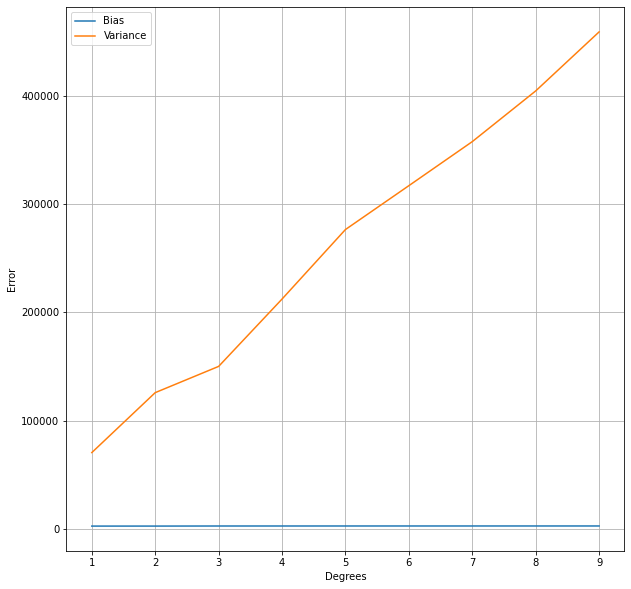

In [ ]:
degrees=list(range(1,10))
plt.figure(figsize=(10,10))
plt.plot(degrees,bias)
plt.plot(degrees,variance)
plt.xlabel('Degrees')
plt.ylabel('Error')
plt.legend(['Bias','Variance'])
plt.grid();

Write your observations in
the report with respect to underfitting, overfitting and also comment on the
type of data just by looking at the bias-variance plot.

# Report:
From the above results we observe that the error was high and it continues to decrease until it reaches d=3, then it starts to raise again(plot above shown that).

And also the variance starts to increase from d=1 to d=9 .

We observe clearly that for d < 3 the model repersent underfitting condition and still did not fit the data well. And also for d > 3 it represented clearly overfitting situation.

So, we can use bias-variance trade off to decide that the right and best degree for our model(solution) is d=3.